<a href="https://www.kaggle.com/code/hishamkhdair/102flowers-classification?scriptVersionId=102174995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import fastai
from fastai.vision.all import *

In [2]:
path = Path('../input/102flowers-data/102flowers')
path.ls()

(#2) [Path('../input/102flowers-data/102flowers/train'),Path('../input/102flowers-data/102flowers/labels.csv')]

The information about the labels of each image is in the file named labels.csv. Load it using pandas:

In [3]:
df = pd.read_csv(path/'labels.csv')
df.head()

,fname,label
0,image_00001.jpg,passion flower
1,image_00002.jpg,passion flower
2,image_00003.jpg,passion flower
3,image_00004.jpg,passion flower
4,image_00005.jpg,passion flower


We use `ImageDataLoaders.from_df` to create a dataloader the dateframe that was created before, we use large batch size and apply data augmentations

In [4]:
dls = ImageDataLoaders.from_df(df, path/'train', label_col='label', 
                               valid_pct=0.2, seed=42, 
                               batch_size=64, item_tfms=RandomResizedCrop(224, min_scale=0.5), 
                               batch_tfms=aug_transforms())

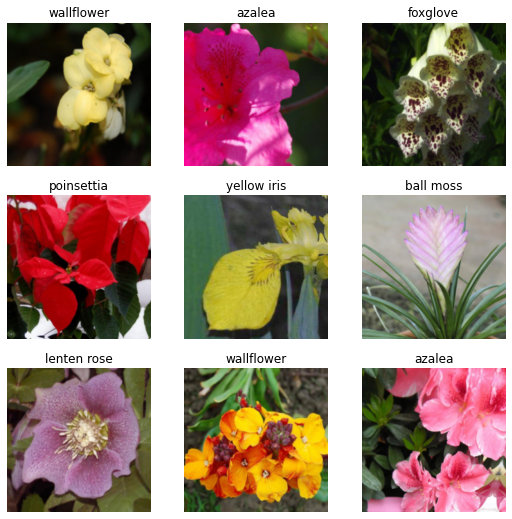

In [5]:
dls.show_batch()

Define a vision learner with `ResNet50` pretrained model, and `error_rate` for multi class classification

In [6]:
learn = vision_learner(dls, resnet50, metrics=error_rate, model_dir='/tmp/model/')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Finding the best learning rate for training

SuggestedLRs(valley=0.0010000000474974513)

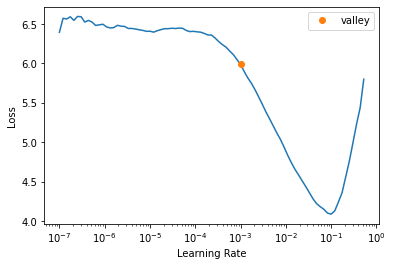

In [7]:
learn.lr_find()

Fine tuning the model on the training dataset

In [8]:
# 8 epochs, 7e-4 learning rate as suggested by lr_find()
learn.fine_tune(8, 7e-4)

epoch,train_loss,valid_loss,error_rate,time
0,2.723994,0.678335,0.169212,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.858527,0.381240,0.084911,01:16
1,0.521965,0.229312,0.058033,01:17
2,0.306784,0.163008,0.042150,01:17
3,0.188566,0.131188,0.032987,01:17
4,0.121475,0.111755,0.032376,01:17
5,0.080296,0.097239,0.026268,01:17
6,0.057155,0.087744,0.021991,01:17
7,0.047726,0.085679,0.024435,01:16


Let us have a look at some predictions with the show_results method:

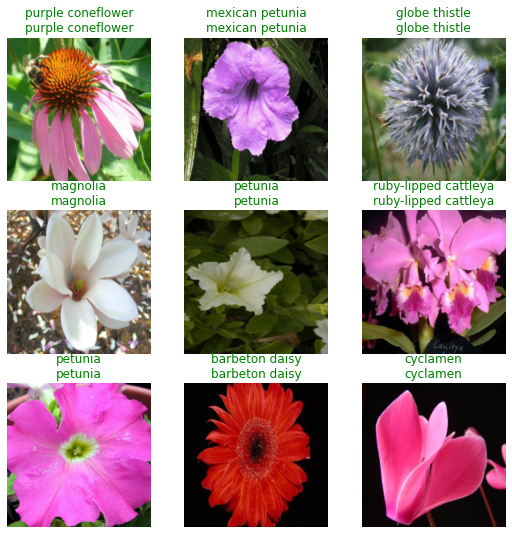

In [9]:
learn.show_results()